<a href="https://colab.research.google.com/github/massinoLight/Tp_MFBD/blob/main/Arbre_de_decision2_Amassin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("rpart.plot")
install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ipred’, ‘pROC’, ‘recipes’, ‘reshape2’




In [2]:
library(rpart)
library(rpart.plot)
library("readxl")
library(caret) 

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [3]:
md <- read_excel("/content/TreeSet2.xlsx")
show(md)

# Factorisation
md <- md[,c("meteo","amis","vent","jour","DEC")]
md$DEC <- as.factor(md$DEC)
md$meteo <- as.factor(md$meteo)
md$amis <- as.factor(md$amis)
md$vent <- as.factor(md$vent)
md$jour <- as.factor(md$jour)

str(md)
summary(md)
show (md)

# A tibble: 14 × 5
   meteo  amis  vent   jour  DEC  
   <chr>  <chr> <chr>  <chr> <chr>
 1 soleil pr    faible we    oui  
 2 soleil ab    fort   sem   non  
 3 soleil pr    fort   sem   non  
 4 soleil ab    faible sem   oui  
 5 nua    ab    faible we    non  
 6 nua    pr    fort   we    non  
 7 nua    ab    fort   sem   non  
 8 nua    pr    faible we    oui  
 9 soleil ab    faible we    non  
10 soleil pr    fort   we    non  
11 nua    ab    faible sem   non  
12 soleil pr    faible we    oui  
13 soleil ab    faible sem   non  
14 nua    pr    faible sem   oui  
tibble [14 × 5] (S3: tbl_df/tbl/data.frame)
 $ meteo: Factor w/ 2 levels "nua","soleil": 2 2 2 2 1 1 1 1 2 2 ...
 $ amis : Factor w/ 2 levels "ab","pr": 2 1 2 1 1 2 1 2 1 2 ...
 $ vent : Factor w/ 2 levels "faible","fort": 1 2 2 1 1 2 2 1 1 2 ...
 $ jour : Factor w/ 2 levels "sem","we": 2 1 1 1 2 2 1 2 2 2 ...
 $ DEC  : Factor w/ 2 levels "non","oui": 2 1 1 2 1 1 1 2 1 1 ...


    meteo   amis       vent    jour    DEC   
 nua   :6   ab:7   faible:9   sem:7   non:9  
 soleil:8   pr:7   fort  :5   we :7   oui:5  

# A tibble: 14 × 5
   meteo  amis  vent   jour  DEC  
   <fct>  <fct> <fct>  <fct> <fct>
 1 soleil pr    faible we    oui  
 2 soleil ab    fort   sem   non  
 3 soleil pr    fort   sem   non  
 4 soleil ab    faible sem   oui  
 5 nua    ab    faible we    non  
 6 nua    pr    fort   we    non  
 7 nua    ab    fort   sem   non  
 8 nua    pr    faible we    oui  
 9 soleil ab    faible we    non  
10 soleil pr    fort   we    non  
11 nua    ab    faible sem   non  
12 soleil pr    faible we    oui  
13 soleil ab    faible sem   non  
14 nua    pr    faible sem   oui  


In [4]:
train <- createDataPartition(md$DEC,p=0.75,list=FALSE)
mdtr <- md[train,]
mdts <- md[-train,]

n= 11 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 11 4 non (0.6363636 0.3636364)  
  2) amis=ab 4 0 non (1.0000000 0.0000000) *
  3) amis=pr 7 3 oui (0.4285714 0.5714286)  
    6) vent=fort 3 0 non (1.0000000 0.0000000) *
    7) vent=faible 4 0 oui (0.0000000 1.0000000) *


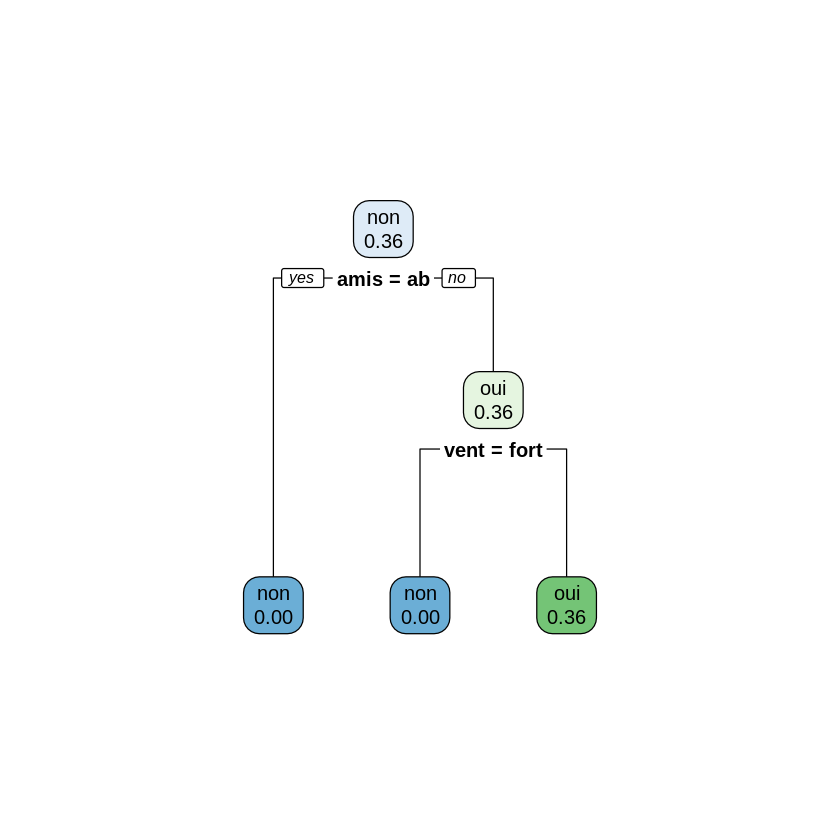

In [5]:
# Modele sur les données train
ftree <- rpart(DEC ~., data =mdtr,method="class", control=rpart.control(minsplit=0.0001, mindepth = 4,cp= -2))

#Arbre
rpart.plot(ftree, extra = 10)

#Affichage des regles de construction
print(ftree)

In [6]:
#Affichage du resultat de donnees coisees
printcp(ftree)

cpp <- ftree$cptable[which.min(ftree$cptable[,4]),1]

#Elagage de cp 
mtt <- prune(ftree, cp=cpp)

#Affichage cp optimal 
print(cpp)


Classification tree:
rpart(formula = DEC ~ ., data = mdtr, method = "class", control = rpart.control(minsplit = 1e-04, 
    mindepth = 4, cp = -2))

Variables actually used in tree construction:
[1] amis vent

Root node error: 4/11 = 0.36364

n= 11 

    CP nsplit rel error xerror    xstd
1  0.5      0         1      1 0.39886
2 -2.0      2         0      1 0.39886
[1] 0.5



Classification tree:
rpart(formula = DEC ~ ., data = mdtr, method = "class", control = rpart.control(minsplit = 1e-04, 
    mindepth = 4, cp = -2))

Variables actually used in tree construction:
character(0)

Root node error: 4/11 = 0.36364

n= 11 

   CP nsplit rel error xerror    xstd
1 0.5      0         1      1 0.39886


Confusion Matrix and Statistics

     predi
      non oui
  non   2   0
  oui   1   0
                                          
               Accuracy : 0.6667          
                 95% CI : (0.0943, 0.9916)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.6667          
            Specificity :     NA          
         Pos Pred Value :     NA          
         Neg Pred Value :     NA          
             Prevalence : 1.0000          
         Detection Rate : 0.6667          
   Detection Prevalence : 0.6667          
      Balanced Accuracy :     NA          
                                          
       'Positive' Class : non             
                                          

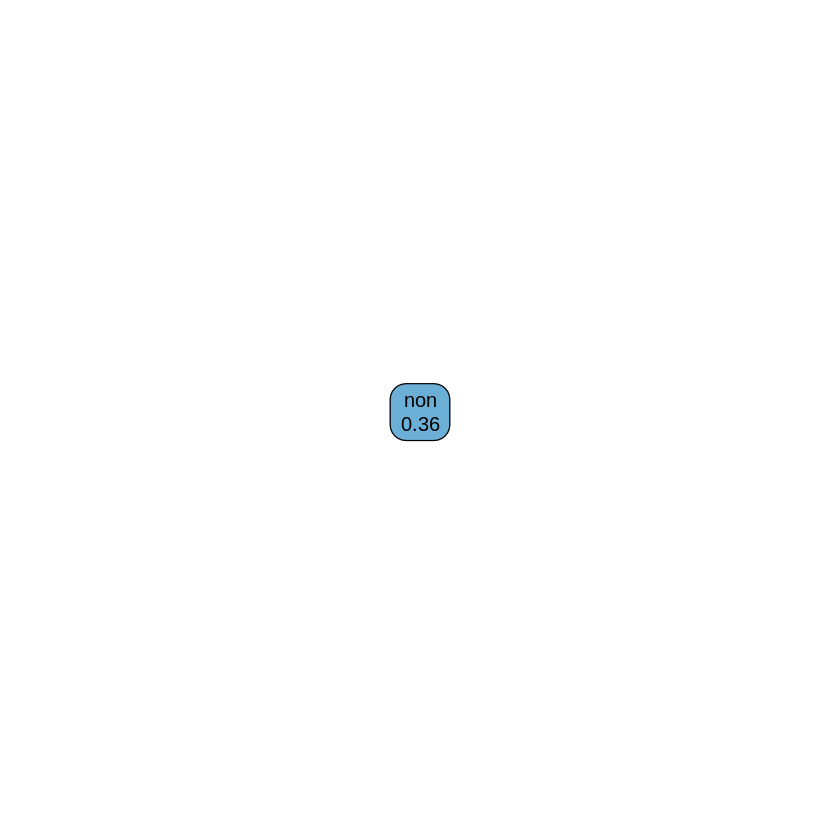

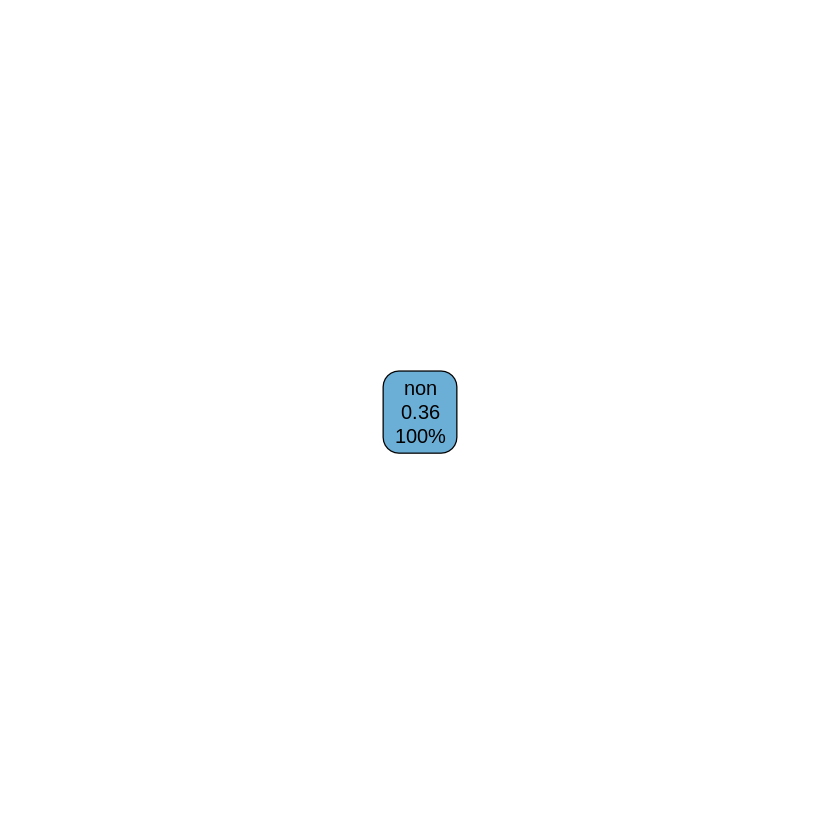

In [7]:
#Arbre
rpart.plot(mtt, extra = 10)


#Affichage du resultat de donnees coisees
printcp(mtt)


############# PREVISIONS

#Prediction
predi<-  predict(mtt, mdts, type = "class")

#Matrice de confusion
confusionMatrix(table(mdts$DEC,predi))

#Arbre final
rpart.plot(mtt)